To do:

1)Pie charta ara koy https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

2)Name wordcloud

In [1]:
import numpy as np # numerical python
import pandas as pd # data processing
import matplotlib as plt2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter
import seaborn as sns #statistical data visualization
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm 
import pylab as py 



import warnings#ignore warnings
warnings.filterwarnings("ignore")


print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)
print("Matplotlib version:",plt2.__version__)
print("Seaborn version:",sns.__version__)

Pandas version: 1.1.3
Numpy version: 1.19.2
Matplotlib version: 3.3.4
Seaborn version: 0.11.0


In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
gender_submission = pd.read_csv("data/gender_submission.csv")
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Cabin"] = train["Cabin"].fillna("G6")
train["Embarked"] = train["Embarked"].fillna("Q")
print(pd.isnull(train).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


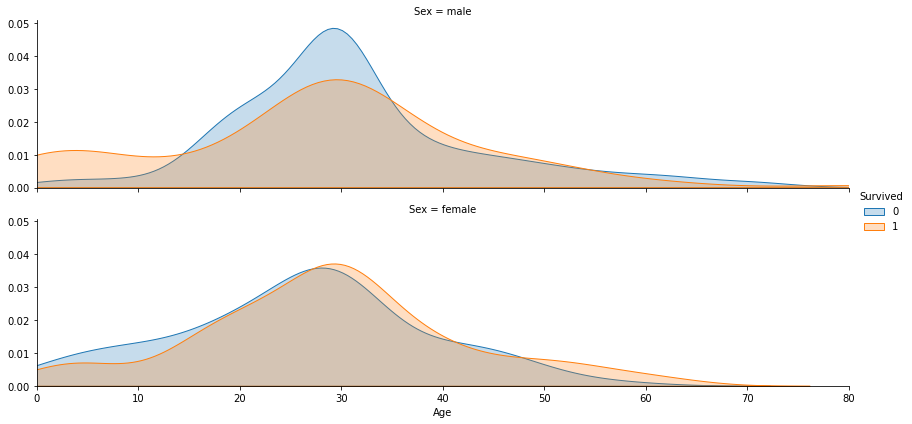

In [3]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
plot_distribution( train , var = 'Age' , target = 'Survived' , row = 'Sex' )


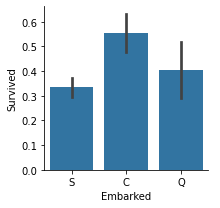

In [4]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
    
plot_categories( train , cat = 'Embarked' , target = 'Survived' )


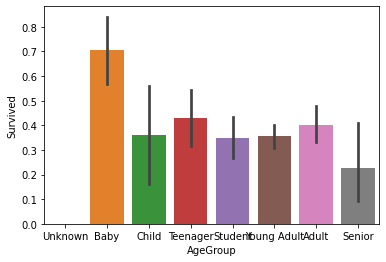

In [5]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

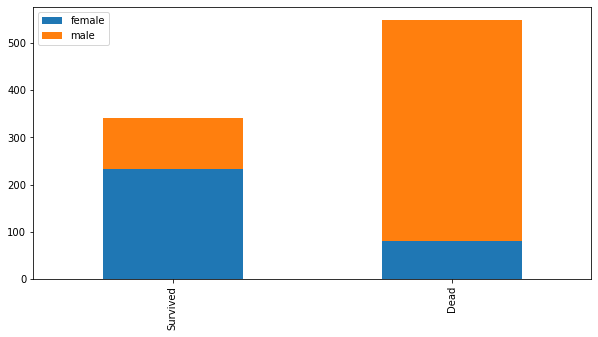

In [6]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
bar_chart('Sex')


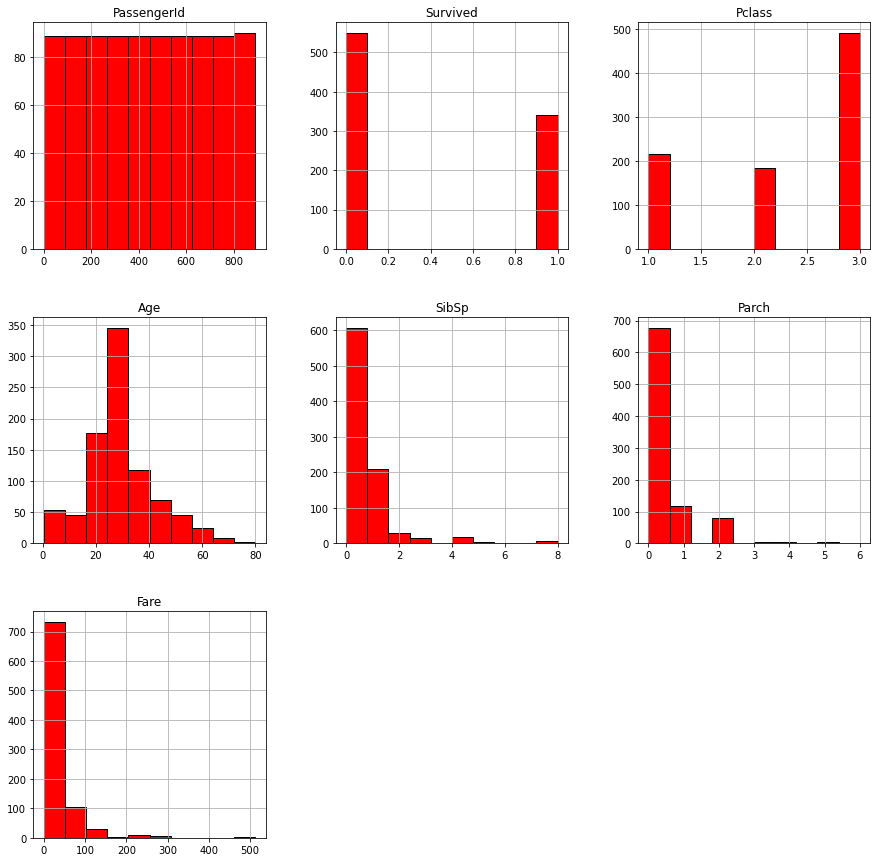

In [7]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
train.hist(ax=ax, color='r', edgecolor='black')
plt.show()

# Autoviz

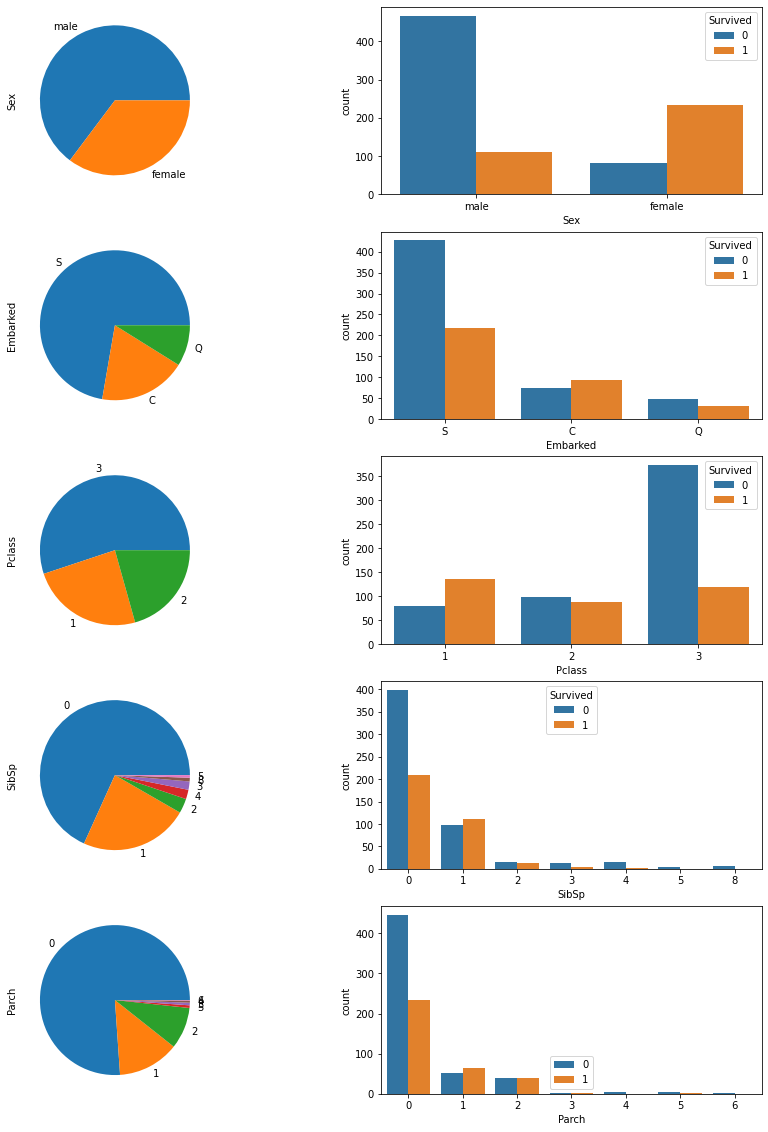

In [8]:
fig, ax = plt.subplots(ncols=2,nrows=5,figsize=(15, 20))

train['Sex'].value_counts().plot.pie(ax=ax[0,0])
sns.countplot(x='Sex', hue="Survived", data=train,ax=ax[0,1])

train['Embarked'].value_counts().plot.pie(ax=ax[1,0])
sns.countplot(x='Embarked', hue="Survived", data=train,ax=ax[1,1])

train['Pclass'].value_counts().plot.pie(ax=ax[2,0])
sns.countplot(x='Pclass', hue="Survived", data=train,ax=ax[2,1])

train['SibSp'].value_counts().plot.pie(ax=ax[3,0])
sns.countplot(x='SibSp', hue="Survived", data=train,ax=ax[3,1])

train['Parch'].value_counts().plot.pie(ax=ax[4,0])
sns.countplot(x='Parch', hue="Survived", data=train,ax=ax[4,1])

plt.legend()

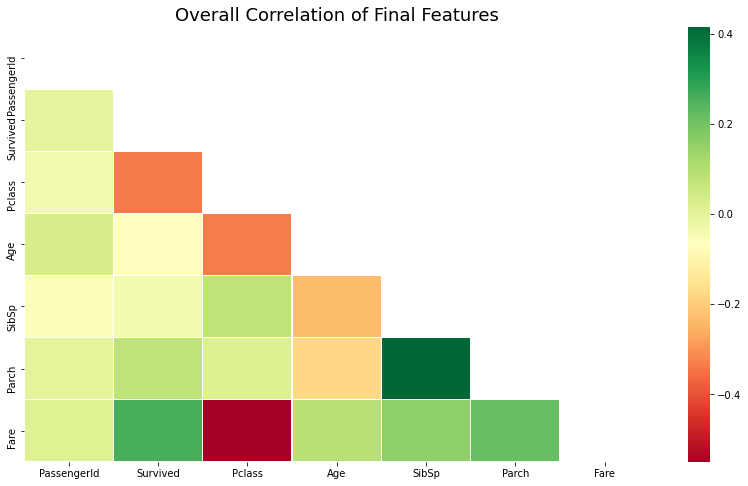

In [9]:
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(14, 8))
plt.title('Overall Correlation of Final Features', fontsize=18)
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

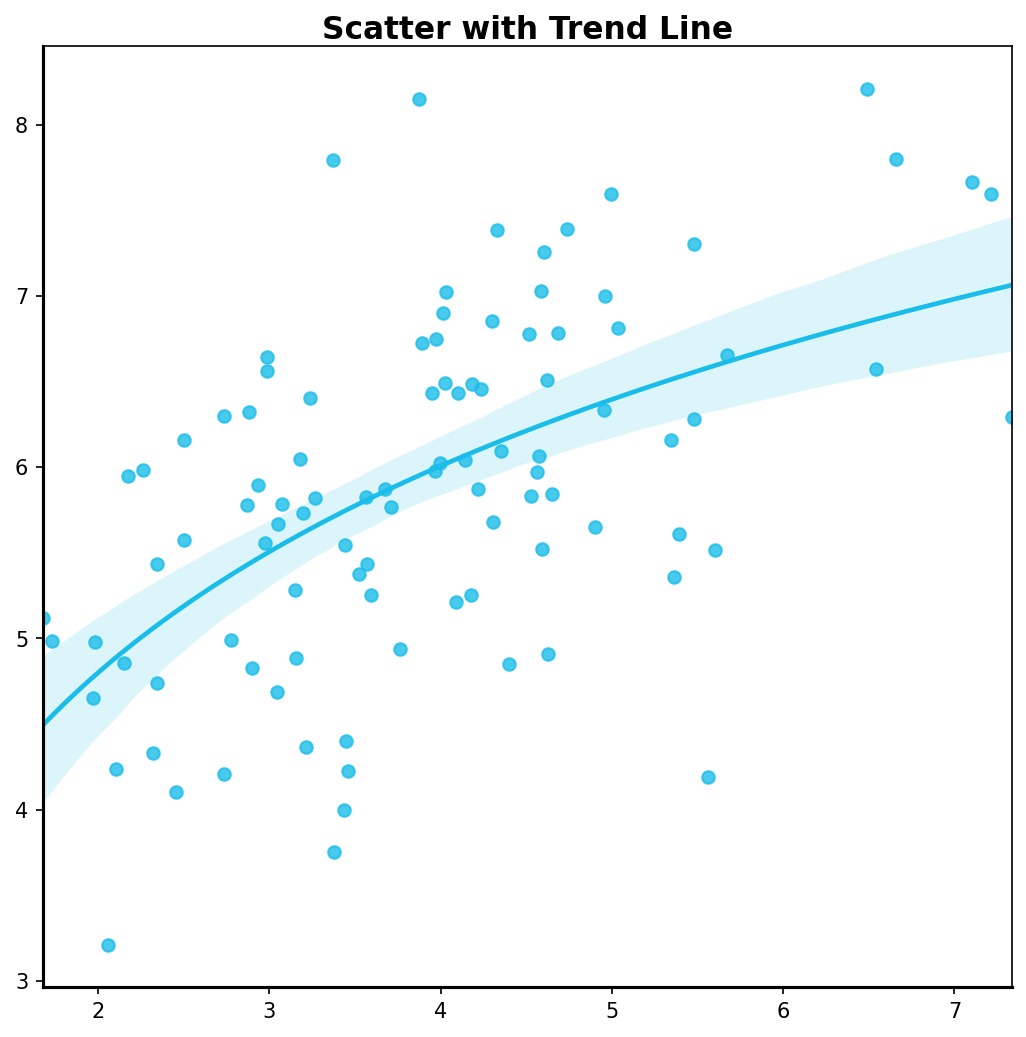

In [10]:
#Scatter with trendline
fig = plt.figure(figsize=(7, 7), dpi=150)
ax = fig.add_subplot(111, aspect=1)

np.random.seed(970725)

mean, cov = [4, 6], [(1.5, .7), (.7, 1)]
x, y = np.random.multivariate_normal(mean, cov, 100).T

sns.regplot(x=x, y=y,  
            color='#1ABDE9',
            logx=True,
            ax=ax)

ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)


ax.set_title(f"Scatter with Trend Line", fontsize=15,va= 'center', fontweight='semibold')


plt.tight_layout()
plt.show()

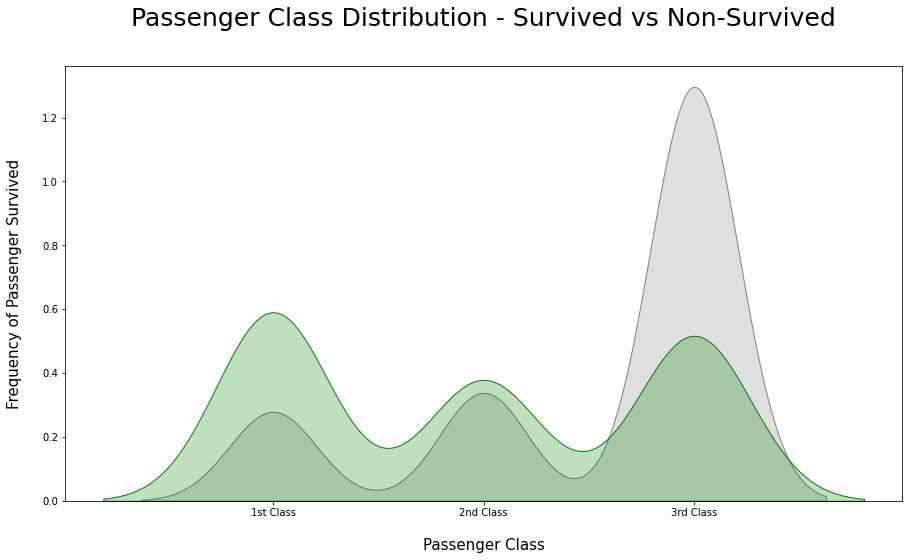

In [11]:
# Density plot
fig = plt.figure(figsize=(15,8),) 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
labels = ['1st Class', '2nd Class', '3rd Class']
plt.xticks(sorted(train.Pclass.unique()), labels);

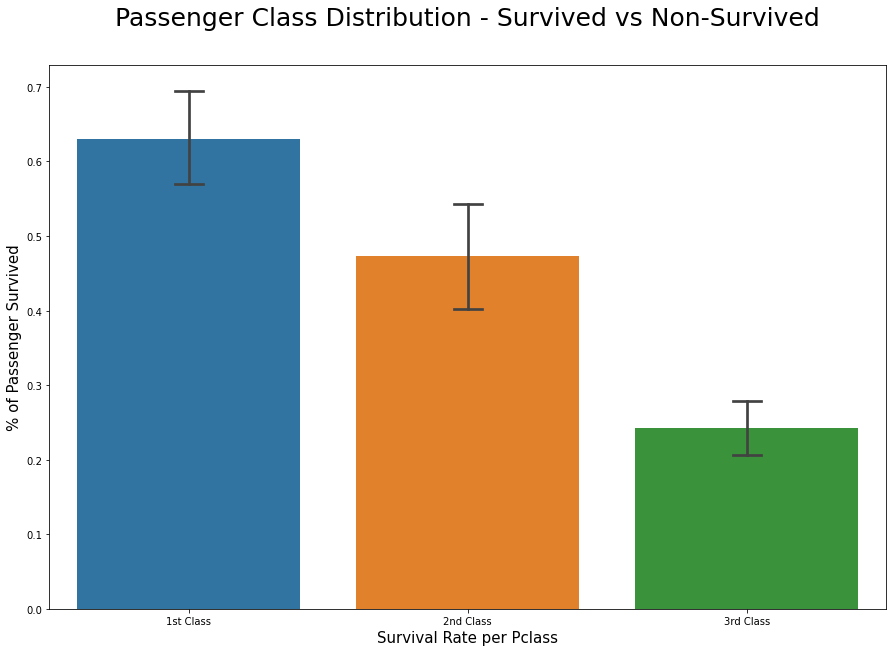

In [12]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=5,
            capsize = 0.1

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Survival Rate per Pclass", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
labels = ['1st Class', '2nd Class', '3rd Class']

val = [0,1,2] ## 임시 방면 temporaray measure
plt.xticks(val, labels);

In [14]:
resource: https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset

SyntaxError: invalid syntax (<ipython-input-14-c9fc1881febc>, line 1)

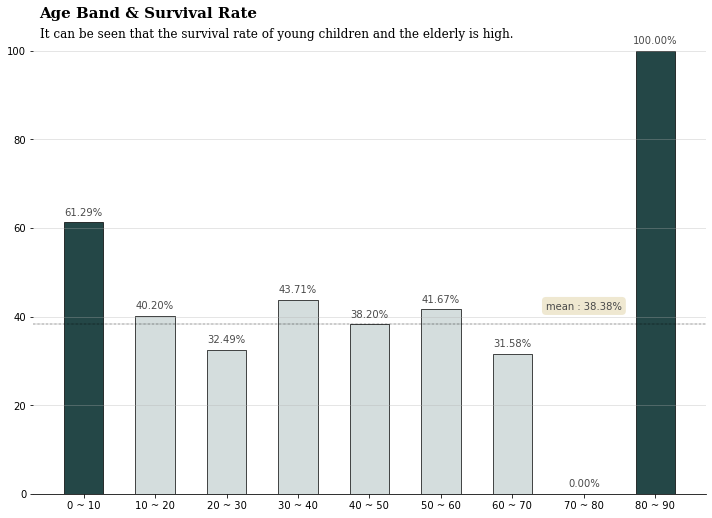

In [13]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

train['age_band'] = train['Age'].apply(age_band)
titanic_age = train[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)



for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')


# mean line + annotation
mean = train['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    

# Title & Subtitle    
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()